In [ ]:
#Mansi Reddy
#Task1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import io

In [ ]:
#importing file to colab
from google.colab import files
myfile=files.upload()

Saving dst1data.csv to dst1data (3).csv


In [ ]:
#printing the data
data = pd.read_csv(io.BytesIO(myfile['dst1data.csv']))
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#checking null values in dataset
data.isnull == True

False

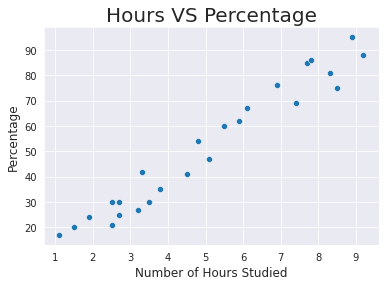

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Hours VS Percentage',size=20)
plt.ylabel('Percentage', size=12)
plt.xlabel('Number of Hours Studied', size=12)
plt.show()

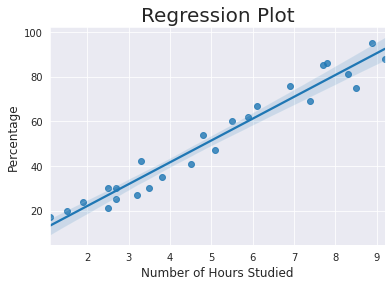

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Percentage', size=12)
plt.xlabel('Number of Hours Studied', size=12)
plt.show()
print(data.corr())

In [ ]:
p = data.iloc[:, :-1].values  
q = data.iloc[:, 1].values
train_p, val_p, train_q, val_q = train_test_split(p, q, random_state = 0)

In [ ]:
lr = LinearRegression()
lr.fit(train_p, train_q)
print("MODEL TRAINED")

MODEL TRAINED


In [ ]:
pred_q = lr.predict(val_p)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_p], 'Predicted Marks': [k for k in pred_q]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [ ]:
scores_compare = pd.DataFrame({'Actual Marks': val_q, 'Predicted Marks': pred_q})
scores_compare

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


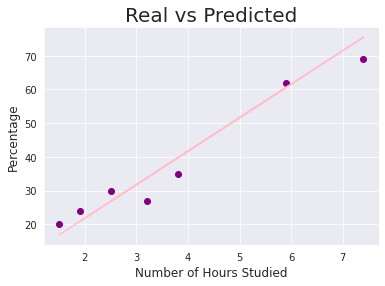

In [ ]:
plt.scatter(x=val_p, y=val_q, color='purple')
plt.plot(val_p, pred_q, color='pink')
plt.title('Real vs Predicted', size=20)
plt.ylabel('Percentage', size=12)
plt.xlabel('Number of Hours Studied', size=12)
plt.show()


In [ ]:
print('mean absolute error: ',mean_absolute_error(val_q,pred_q))

mean absolute error:  4.130879918502482


In [ ]:
hours = [9.25]
final = lr.predict([hours])
print("Score = {}".format(round(final[0],3)))

Score = 93.893
